In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Feature Engineering - 3PT% and 2PT%

In [91]:
dRegSeasonResults = pd.read_csv("../Data/MRegularSeasonDetailedResults.csv")
dTourneyResults = pd.read_csv("../Data/MNCAATourneyDetailedResults.csv")

In [92]:
dRegSeasonResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,128,1389,56,1233,54,N,0,15,60,...,16,18,20,4,27,6,17,8,4,20
92828,2020,128,1393,81,1314,53,N,0,28,61,...,16,11,13,13,29,9,18,0,1,18
92829,2020,128,1402,85,1111,68,H,0,34,57,...,15,25,35,8,17,6,18,7,2,18
92830,2020,128,1412,74,1427,69,N,0,26,53,...,27,7,7,12,22,11,13,4,2,18


In [26]:
# gets 3PT Attempt Percentage
def threeFgap(row):
    if "WFGA" in row:
        threeFgap = row["WFGA3"]/float(row["WFGA"])
    else:
        threeFgap = row["LFGA3"]/float(row["LFGA"])
    return threeFgap
# Gets 2PT Attempt percentage by taking the percent of all field goal attempts which aren't 3PTs
def twoFgap(row):
    if "WFGA" in row:
        twoFgap = float(row["WFGA"] - row["WFGA3"])/float(row["WFGA"])
    else:
        twoFgap = float(row["LFGA"] - row["LFGA3"])/float(row["LFGA"])
    return twoFgap

In [27]:
dRegSeasonResults["WFGA%3"] = dRegSeasonResults[["WFGA", "WFGA3"]].apply(threeFgap, axis=1)
dRegSeasonResults["WFGA%2"] = dRegSeasonResults[["WFGA", "WFGA3"]].apply(twoFgap, axis=1)
dRegSeasonResults["LFGA%3"] = dRegSeasonResults[["LFGA", "LFGA3"]].apply(threeFgap, axis=1)
dRegSeasonResults["LFGA%2"] = dRegSeasonResults[["LFGA", "LFGA3"]].apply(twoFgap, axis=1)

In [28]:
# New Regular Season box scores with new features
dRegSeasonResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LDR,LAst,LTO,LStl,LBlk,LPF,WFGA%3,WFGA%2,LFGA%3,LFGA%2
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,8,18,9,2,20,0.241379,0.758621,0.188679,0.811321
1,2003,10,1272,70,1393,63,N,0,26,62,...,25,7,12,8,6,16,0.322581,0.677419,0.358209,0.641791
2,2003,11,1266,73,1437,61,N,0,24,58,...,22,9,12,2,5,23,0.310345,0.689655,0.356164,0.643836
3,2003,11,1296,56,1457,50,N,0,18,38,...,20,9,19,4,3,23,0.236842,0.763158,0.448980,0.551020
4,2003,11,1400,77,1208,71,N,0,30,61,...,15,12,10,7,1,14,0.229508,0.770492,0.258065,0.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,128,1389,56,1233,54,N,0,15,60,...,27,6,17,8,4,20,0.400000,0.600000,0.347826,0.652174
92828,2020,128,1393,81,1314,53,N,0,28,61,...,29,9,18,0,1,18,0.344262,0.655738,0.266667,0.733333
92829,2020,128,1402,85,1111,68,H,0,34,57,...,17,6,18,7,2,18,0.210526,0.789474,0.326087,0.673913
92830,2020,128,1412,74,1427,69,N,0,26,53,...,22,11,13,4,2,18,0.264151,0.735849,0.402985,0.597015


In [29]:
# Do same for tourney attenders
dTourneyResults["WFGA%3"] = dTourneyResults[["WFGA", "WFGA3"]].apply(threeFgap, axis=1)
dTourneyResults["WFGA%2"] = dTourneyResults[["WFGA", "WFGA3"]].apply(twoFgap, axis=1)
dTourneyResults["LFGA%3"] = dTourneyResults[["LFGA", "LFGA3"]].apply(threeFgap, axis=1)
dTourneyResults["LFGA%2"] = dTourneyResults[["LFGA", "LFGA3"]].apply(twoFgap, axis=1)

In [30]:
# New Tournament box scores with new features
dTourneyResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LDR,LAst,LTO,LStl,LBlk,LPF,WFGA%3,WFGA%2,LFGA%3,LFGA%2
0,2003,134,1421,92,1411,84,N,1,32,69,...,28,16,15,5,0,22,0.420290,0.579710,0.462687,0.537313
1,2003,136,1112,80,1436,51,N,0,31,66,...,26,12,17,10,3,15,0.348485,0.651515,0.250000,0.750000
2,2003,136,1113,84,1272,71,N,0,31,59,...,22,11,12,2,5,18,0.237288,0.762712,0.405797,0.594203
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,20,21,6,6,21,0.132075,0.867925,0.283333,0.716667
4,2003,136,1143,76,1301,74,N,1,27,64,...,26,16,14,5,8,19,0.312500,0.687500,0.375000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,30,14,14,5,5,19,0.353846,0.646154,0.344262,0.655738
1111,2019,146,1277,68,1181,67,N,0,30,70,...,29,14,17,4,9,9,0.271429,0.728571,0.368421,0.631579
1112,2019,152,1403,61,1277,51,N,0,22,51,...,28,6,11,1,2,15,0.450980,0.549020,0.510638,0.489362
1113,2019,152,1438,63,1120,62,N,0,25,51,...,24,9,5,3,3,12,0.372549,0.627451,0.563636,0.436364


## KenPom Rankings Setup (for model)

In [3]:
kpom = pd.read_csv("../Data/kpom.csv")
teams = pd.read_csv("../Data/MTeams.csv")
teams = teams.set_index("TeamName")
kpom

,Rk,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM.1,OppO,OppD,AdjEM.2,TeamID
0,1,Gonzaga,WCC,26-0,37.92,126.8,88.9,74.8,0.018,7.67,105.8,98.1,5.88,1211.0
1,2,Michigan,B10,20-3,32.46,120.4,88.0,67.1,0.052,16.29,110.9,94.6,2.90,1276.0
2,3,Illinois,B10,21-6,31.36,119.6,88.3,70.6,0.015,17.92,111.7,93.8,9.47,1228.0
3,4,Iowa,B10,21-7,30.75,125.0,94.3,69.9,-0.019,16.11,110.0,93.9,-5.56,1234.0
4,5,Baylor,B12,22-2,30.74,124.1,93.3,68.5,0.050,9.40,106.4,97.0,-4.40,1124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,353,South Carolina St,MEAC,17-1,-23.69,87.7,111.4,72.0,-0.109,-4.83,98.2,103.0,1.87,NaN
353,354,Alabama St,SWAC,14-4,-25.30,84.6,109.9,71.1,-0.049,-15.73,90.9,106.6,-99.00,1106.0
354,355,Maryland Eastern Shore,MEAC,0-0,-25.73,84.8,110.5,68.0,0.000,-99.00,0.0,200.0,-99.00,NaN
355,356,Chicago St,WAC,0-9,-28.06,89.0,117.1,67.8,-0.006,8.80,106.8,98.0,8.80,1152.0


In [32]:
# Commented out so there is no need to add teamIDs everytime (only on first run)

# def getTeamID(row):
#     teamName = row["Team"]
#     if teamName in teams.index:
#         return teams.loc[teamName]["TeamID"]
# kpom["TeamID"] = kpom.apply(getTeamID , axis=1)
# kpom.to_csv("../Data/kpom.csv", index=False)

## Feature Setup for Logistic Regression Model
The output of this section are a few datasets:
- xTrain - features training data
- yTrain - label training data
- xTest - features test data
- yTest - label test data
- features - features by team, as utilized in making further predictions

Model features are:
- Seed Differential
- KenPom Ranking
- FG%
- FGM
- Pts
- TS%
- Possesions
- Defensive Rebounds
- Assists
- Offensive Rating
- Defensive Rating
- Net Rating
- Team PIE

as exploratory data analysis showed these variables to have a stronger correlation with point differential, which dictates wins.

There are 4 of each variable in a training example (except for seed differential, only one, and KenPom Ranking, only one per team). Each team has 2 of each variable for historical regular season performance and postseason performance, for both the winning team and losing team. In total then, there are about 47 variables.

In [88]:
# Merging seeds with tourney dataset, code written by jacobrichman27
seeds = pd.read_csv("../Data/LogisticRegressionData/MNCAATourneySeeds.csv")
teams = pd.read_csv("../Data/LogisticRegressionData/MTeams.csv")
dTourneyResults = dTourneyResults.merge(seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'WSeed'})
dTourneyResults = dTourneyResults.merge(seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'LSeed'})
dTourneyResults['WSeed'] = dTourneyResults['WSeed'].str.replace(r'[^0-9]', '').astype('float')
dTourneyResults['LSeed'] = dTourneyResults['LSeed'].str.replace(r'[^0-9]', '').astype('float')
dTourneyResults

NameError: name 'dTourneyResults' is not defined

In [93]:
# adding all the necessary features to data frame. This data will then be pulled to 
# form training data
def addFeatures(df):
#     df["WFG%"] = df.apply(lambda row: row.WFGM/row.WFGA, axis=1)
#     df["LFG%"] = df.apply(lambda row: row.LFGM/row.LFGA, axis=1)
    df["WPts"] = df.apply(lambda row: 2*row.WFGM + row.WFGM3 + row.WFTM, axis=1)
    df["LPts"] = df.apply(lambda row: 2*row.LFGM + row.LFGM3 + row.LFTM, axis=1)
#     df["WTS%"] = df.apply(lambda row: row.WPts/(2*(row.WFGA + 0.44 * row.WFTA)), axis=1)
#     df["LTS%"] = df.apply(lambda row: row.LPts/(2*(row.LFGA + 0.44 * row.LFTA)), axis=1)
    df["WPos"] = df.apply(lambda row: 0.96*(row.WFGA - row.WOR + row.WTO + 0.44*row.WFTA), axis=1)
    df["LPos"] = df.apply(lambda row: 0.96*(row.LFGA - row.LOR + row.LTO + 0.44*row.LFTA), axis=1)
#     df["WOffRtg"] = df.apply(lambda row: 100 * (row.WPts/row.WPos), axis=1)
#     df["LDefRtg"] = df.WOffRtg
#     df["LOffRtg"] = df.apply(lambda row: 100 * (row.LPts/row.LPos), axis=1)
#     df["WDefRtg"] = df.LOffRtg
#     df["WNetRtg"] = df.apply(lambda row: row.WOffRtg - row.WDefRtg, axis=1)
#     df["LNetRtg"] = df.apply(lambda row: row.LOffRtg - row.LDefRtg, axis=1)
    df["SM"] = df.apply(lambda row: abs(row.WPts-row.LPts), axis=1)
    df["WTRATIO"] = df.apply(lambda row: row.WAst/row.WTO if row.WTO else row.WAst, axis=1)
    df["LTRATIO"] = df.apply(lambda row: row.LAst/row.LTO if row.LTO else row.LAst, axis=1)
    df["WAdjO"] = df.apply(lambda row: 100 * row.WPts/row.WPos, axis=1)
    df["WAdjD"] = df.apply(lambda row: 100 * row.LPts/row.LPos, axis=1)
    df["LAdjO"] = df.WAdjD
    df["LAdjD"] = df.WAdjO
#     df["WPIE"] = df.apply(lambda row: (row.WPts + row.WFGM+row.WFTM - row.WFGA - row.WFTA + row.WDR + 0.5*row.WOR + row.WAst +row.WStl + 0.5 * row.WBlk - row.WPF - row.WTO)/((row.LPts + row.WPts) + (row.LFGM + row.WFGM) + (row.LFTM+row.WFTM) - (row.LFGA+row.WFGA) - (row.LFTA+row.WFTA) + (row.LDR+row.WDR) + 0.5*(row.LOR+row.WOR) + (row.LAst+row.WAst) +(row.LStl+row.WStl) + 0.5 * (row.LBlk+row.WBlk) - (row.LPF+row.WPF) - (row.LTO+row.WTO)), axis=1)
#     df["LPIE"] = df.apply(lambda row: (row.LPts + row.LFGM+row.LFTM - row.LFGA - row.LFTA + row.LDR + 0.5*row.LOR + row.LAst +row.LStl + 0.5 * row.LBlk - row.LPF - row.LTO)/((row.LPts + row.WPts) + (row.LFGM + row.WFGM) + (row.LFTM+row.WFTM) - (row.LFGA+row.WFGA) - (row.LFTA+row.WFTA) + (row.LDR+row.WDR) + 0.5*(row.LOR+row.WOR) + (row.LAst+row.WAst) +(row.LStl+row.WStl) + 0.5 * (row.LBlk+row.WBlk) - (row.LPF+row.WPF) - (row.LTO+row.WTO)), axis=1)


In [94]:
addFeatures(dRegSeasonResults)
addFeatures(dTourneyResults)
dTourneyResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LPts,WPos,LPos,SM,WTRATIO,LTRATIO,WAdjO,WAdjD,LAdjO,LAdjD
0,2003,134,1421,92,1411,84,N,1,32,69,...,84,75.3024,75.4944,8,1.416667,1.066667,122.174061,111.266531,111.266531,122.174061
1,2003,136,1112,80,1436,51,N,0,31,66,...,51,74.0736,73.0368,29,1.375000,0.705882,108.000691,69.827813,69.827813,108.000691
2,2003,136,1113,84,1272,71,N,0,31,59,...,71,64.9728,67.4304,13,2.000000,0.916667,129.284870,105.293755,105.293755,129.284870
3,2003,136,1141,79,1166,73,N,0,29,53,...,73,68.1600,71.5008,6,0.833333,0.952381,115.903756,102.096760,102.096760,115.903756
4,2003,136,1143,76,1301,74,N,1,27,64,...,74,66.3552,66.0480,2,1.307692,1.142857,114.535108,112.039729,112.039729,114.535108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,71,69.6576,70.3104,6,0.888889,1.000000,110.540702,100.980794,100.980794,110.540702
1111,2019,146,1277,68,1181,67,N,0,30,70,...,67,65.8944,64.0512,1,2.571429,0.823529,103.195416,104.603817,104.603817,103.195416
1112,2019,152,1403,61,1277,51,N,0,22,51,...,51,58.2912,55.6032,10,1.142857,0.545455,104.647014,91.721340,91.721340,104.647014
1113,2019,152,1438,63,1120,62,N,0,25,51,...,62,56.9088,54.8736,1,1.875000,1.800000,110.703441,112.986937,112.986937,110.703441


In [95]:
# Data Frame of all features for a single team
train = {"TeamID": [], "KPomRk": [], "AFGM":[], "AAst":[], "ADR":[], "AOR":[], "APF":[], "ASM":[], "AFTA":[], "ATRATIO":[],"AAdjO":[], "AAdjD":[]}
test = {"TeamID": [], "KPomRk": [], "AFGM":[], "AAst":[], "ADR":[], "AOR":[], "APF":[], "ASM":[], "AFTA":[], "ATRATIO":[],"AAdjO":[], "AAdjD":[]}
features = {"TeamID": [], "KPomRk": [], "AFGM":[], "AAst":[], "ADR":[], "AOR":[], "APF":[], "ASM":[], "AFTA":[], "ATRATIO":[],"AAdjO":[], "AAdjD":[]}

In [96]:
wRegSeasonRes = dRegSeasonResults.query('WTeamID == 1402')
lRegSeasonRes = dRegSeasonResults.query('LTeamID == 1402')
wTourneyRes = dTourneyResults.query('WTeamID == 1402')
lTourneyRes = dTourneyResults.query('LTeamID == 1402')
len(lTourneyRes)

0

In [97]:
# Populates dicts in above cell
def aggregateTeamData(data, query):
    print('WTeamID == %d & %s' % (-1,query))
#     kpomSorted = kpom.set_index("TeamID")
    fgm, ast, dr, ofr, pf, sm, fta, tratio, adjd, ajdo = 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
    for team in teams.set_index("TeamID").index:
        wTourneyRes = dTourneyResults.query('WTeamID == %d & %s' % (team,query))
        lTourneyRes = dTourneyResults.query('LTeamID == %d & %s' % (team,query))
        wRegSeasonRes = dRegSeasonResults.query('WTeamID == %d & %s' % (team,query))
        lRegSeasonRes = dRegSeasonResults.query('LTeamID == %d & %s' % (team,query))
        tourneyAvailable = len(lTourneyRes) != 0 and len(wTourneyRes) != 0
        data["TeamID"].append(team)
        data["KPomRk"].append(-1)
        fgm = (wRegSeasonRes.WFGM.mean() + lRegSeasonRes.LFGM.mean())/2
        ast = (wRegSeasonRes.WAst.mean() + lRegSeasonRes.LAst.mean())/2
        dr = (wRegSeasonRes.WDR.mean() + lRegSeasonRes.LDR.mean())/2
        ofr = (wRegSeasonRes.WOR.mean() + lRegSeasonRes.LOR.mean())/2
        pf = (wRegSeasonRes.WPF.mean() + lRegSeasonRes.LPF.mean())/2
        sm = (wRegSeasonRes.SM.mean() + lRegSeasonRes.SM.mean())/2
        fta = (wRegSeasonRes.WFTA.mean() + lRegSeasonRes.LFTA.mean())/2
        tratio = (wRegSeasonRes.WTRATIO.mean() + lRegSeasonRes.LTRATIO.mean())/2
        adjd = (wRegSeasonRes.WAdjD.mean() + lRegSeasonRes.LAdjD.mean())/2
        adjo = (wRegSeasonRes.WAdjO.mean() + lRegSeasonRes.LAdjO.mean())/2
        if tourneyAvailable:
            fgm += (wTourneyRes.WFGM.mean() + lTourneyRes.LFGM.mean())/2
            ast += (wTourneyRes.WAst.mean() + lTourneyRes.LAst.mean())/2
            dr += (wTourneyRes.WDR.mean() + lTourneyRes.LDR.mean())/2
            ofr += (wTourneyRes.WOR.mean() + lTourneyRes.LOR.mean())/2
            pf += (wTourneyRes.WPF.mean() + lTourneyRes.LPF.mean())/2
            sm += (wTourneyRes.SM.mean() + lTourneyRes.SM.mean())/2
            fta += (wTourneyRes.WFTA.mean() + lTourneyRes.LFTA.mean())/2
            tratio += (wTourneyRes.WTRATIO.mean() + lTourneyRes.LTRATIO.mean())/2
            adjd += (wTourneyRes.WAdjD.mean() + lTourneyRes.LAdjD.mean())/2
            adjo += (wTourneyRes.WAdjO.mean() + lTourneyRes.LAdjO.mean())/2
        
        data["AFGM"].append(fgm/2 if tourneyAvailable else fgm)
        data["AAst"].append(ast/2 if tourneyAvailable else ast)
        data["ADR"].append(dr/2 if tourneyAvailable else dr)
        data["AOR"].append(ofr/2 if tourneyAvailable else ofr)
        data["APF"].append(pf/2 if tourneyAvailable else pf)
        data["ASM"].append(sm/2 if tourneyAvailable else sm)
        data["AFTA"].append(fta/2 if tourneyAvailable else fta)
        data["ATRATIO"].append(tratio/2 if tourneyAvailable else tratio)
        data["AAdjO"].append(adjo/2 if tourneyAvailable else adjo)
        data["AAdjD"].append(adjd/2 if tourneyAvailable else adjd)

In [98]:
aggregateTeamData(train, "Season < 2015")
aggregateTeamData(test, "Season >= 2015 & Season < 2020")
aggregateTeamData(features, "Season < 2020")

WTeamID == -1 & Season < 2015
WTeamID == -1 & Season >= 2015 & Season < 2020
WTeamID == -1 & Season < 2020


In [99]:
for key in train:
    print(key)
    print(len(train[key]))

TeamID
371
KPomRk
371
AFGM
371
AAst
371
ADR
371
AOR
371
APF
371
ASM
371
AFTA
371
ATRATIO
371
AAdjO
371
AAdjD
371


In [100]:
df = pd.DataFrame(train)
dft = pd.DataFrame(test)
df.set_index('TeamID')

,KPomRk,AFGM,AAst,ADR,AOR,APF,ASM,AFTA,ATRATIO,AAdjO,AAdjD
TeamID,,,,,,,,,,,
1101,-1,22.868421,10.671053,20.855263,7.776316,20.644737,10.486842,25.578947,0.765052,108.475640,120.499442
1102,-1,21.037316,13.520000,19.791602,6.451602,17.200346,12.934892,16.993680,1.296024,108.826009,106.368726
1103,-1,24.404431,13.620888,21.894990,11.561978,19.474443,11.085969,20.742251,1.107606,109.335715,106.815300
1104,-1,23.824484,12.497128,22.422709,11.057335,17.103497,8.496309,21.604838,1.111697,113.921180,112.680280
1105,-1,22.935591,12.036552,24.164212,12.279790,20.057745,12.221324,23.741687,0.847259,98.662642,100.772298
...,...,...,...,...,...,...,...,...,...,...,...
1467,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1469,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
xTrain = {"Team1ID": [], "Team2ID": [], "SeedDiff":[], "KPom1Rk":[], "AFGM":[], "1AAst":[], "1ADR":[], "1AOR":[], "1APF":[], "1ASM":[], "1AFTA":[], "1ATRATIO":[],"1AAdjO":[], "1AAdjD":[], "KPom2Rk":[], "2AFGM":[], "2AAst":[], "2ADR":[], "2AOR":[], "2APF":[], "2ASM":[], "2AFTA":[], "2ATRATIO":[],"2AAdjO":[], "2AAdjD":[]}
xTest = {"Team1ID": [], "Team2ID": [], "SeedDiff":[], "KPom1Rk":[], "AFGM":[], "1AAst":[], "1ADR":[], "1AOR":[], "1APF":[], "1ASM":[], "1AFTA":[], "1ATRATIO":[],"1AAdjO":[], "1AAdjD":[], "KPom2Rk":[], "2AFGM":[], "2AAst":[], "2ADR":[], "2AOR":[], "2APF":[], "2ASM":[], "2AFTA":[], "2ATRATIO":[],"2AAdjO":[], "2AAdjD":[]}
yTrain = []
yTest = []

In [123]:
def buildDataSet(data, label, func):
    dfTrain = df.set_index("TeamID")
    dfTest = dft.set_index("TeamID")
    for index, row in dTourneyResults.iterrows():
        if row.WTeamID in dfTrain.index and row.LTeamID in dfTrain.index and func(row.Season):
            flipIdx = np.random.randint(2) # randomize order of teams
            label.append(flipIdx)
            if flipIdx:
                team1 = dfTrain.loc[row.LTeamID]
                team2 = dfTrain.loc[row.WTeamID]
                data["Team1ID"].append(row.LTeamID)
                data["Team2ID"].append(row.WTeamID)
            else:
                team1 = dfTrain.loc[row.WTeamID]
                team2 = dfTrain.loc[row.LTeamID]
                data["Team1ID"].append(row.WTeamID)
                data["Team2ID"].append(row.LTeamID)
            data['SeedDiff'].append(None)
            keys = [*xTrain][3:]
            i = 0
            for val in team1:
                data[keys[i]].append(val)
                i+=1
            for val in team2:
                data[keys[i]].append(val)
                i+=1
    for index, row in dRegSeasonResults.iterrows():
        if row.WTeamID in dfTrain.index and row.LTeamID in dfTrain.index and func(row.Season):
            flipIdx = np.random.randint(2) # randomize order of teams
            label.append(flipIdx)
            if flipIdx:
                team1 = dfTrain.loc[row.LTeamID]
                team2 = dfTrain.loc[row.WTeamID]
                data["Team1ID"].append(row.LTeamID)
                data["Team2ID"].append(row.WTeamID)
            else:
                team1 = dfTrain.loc[row.WTeamID]
                team2 = dfTrain.loc[row.LTeamID]
                data["Team1ID"].append(row.WTeamID)
                data["Team2ID"].append(row.LTeamID)
            data['SeedDiff'].append(None)
            keys = [*xTrain][3:]
            i = 0
            for val in team1:
                data[keys[i]].append(val)
                i+=1
            for val in team2:
                data[keys[i]].append(val)
                i+=1

In [124]:
buildDataSet(xTrain, yTrain, lambda x: x < 2015)
buildDataSet(xTest, yTest, lambda x: x >= 2015 and x < 2020)

In [125]:
for index in xTrain:
    print(len(xTrain[index]))

61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298
61298


In [126]:
xTrainDf = pd.DataFrame(xTrain)
yTrainDf = np.array(yTrain)
xTestDf = pd.DataFrame(xTest)
yTestDf = np.array(yTest)
featuresDf = pd.DataFrame(features)

In [127]:
# Dropping some examples because the local KenPom rankings database (kpom.csv) are not fully completed for all teams in NCAA (will come back to later if needed)
xTrainDf["Label"] = yTrainDf
xTrainDf = xTrainDf.drop("SeedDiff", axis=1) # Dropping Seed Differential to increase potential training data
xTrainDf = xTrainDf.drop("KPom1Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTrainDf = xTrainDf.drop("KPom2Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTrainDf = xTrainDf.dropna()
xTrainDf

,Team1ID,Team2ID,AFGM,1AAst,1ADR,1AOR,1APF,1ASM,1AFTA,1ATRATIO,...,2AAst,2ADR,2AOR,2APF,2ASM,2AFTA,2ATRATIO,2AAdjO,2AAdjD,Label
0,1411,1421,23.263977,12.106363,24.439869,11.652642,18.845497,12.501595,24.057989,0.824955,...,14.038925,23.966938,10.914736,19.674175,12.036399,21.540737,1.072929,107.634170,113.994750,1
1,1436,1112,23.141568,12.705085,22.469406,12.387762,17.020801,12.635105,17.245850,1.236704,...,14.504258,23.814291,11.431839,16.947526,10.884461,20.534424,1.228979,115.008762,110.353011,1
2,1272,1113,25.334860,13.305910,23.024905,13.017575,19.459292,12.558325,22.182319,1.155845,...,14.707455,22.361153,9.603940,17.812362,12.675332,22.511829,1.348949,114.755297,113.278303,1
3,1141,1166,24.003092,11.556921,20.422357,11.816494,18.812220,13.237143,20.451163,0.724125,...,14.148807,23.301938,9.237404,17.132058,10.089554,17.850834,1.405480,109.048236,109.892699,0
4,1301,1143,24.451156,13.272186,23.542706,10.273923,17.596434,9.821030,20.027797,1.136983,...,13.908623,22.985531,10.743334,17.546604,10.183951,18.839879,1.171026,107.447192,109.166639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61293,1246,1196,25.548210,13.358956,23.655448,12.782017,18.058820,10.677587,21.558917,1.093496,...,13.394965,24.282440,10.816474,16.820667,13.164751,19.962775,1.142497,112.533885,106.509280,1
61294,1276,1277,24.657446,13.589653,21.221763,10.237798,15.408360,10.684839,15.283828,1.375851,...,14.658390,24.281471,11.278464,20.174348,11.032723,19.138292,1.158831,109.333751,107.827884,1
61295,1386,1433,24.669365,13.647279,22.057901,10.132975,17.847096,9.309918,19.163356,1.247074,...,13.239224,21.978307,11.062003,19.026108,10.392912,18.183897,1.353277,110.267858,104.663332,0
61296,1418,1209,24.902575,12.156312,22.977708,12.087475,19.813056,10.595100,21.468189,0.892163,...,12.430996,22.552186,11.102765,17.865489,11.361332,18.993418,1.082846,107.092601,106.796398,0


In [128]:
xTrainDf[xTrainDf.isnull().any(axis=1)]

,Team1ID,Team2ID,AFGM,1AAst,1ADR,1AOR,1APF,1ASM,1AFTA,1ATRATIO,...,2AAst,2ADR,2AOR,2APF,2ASM,2AFTA,2ATRATIO,2AAdjO,2AAdjD,Label


In [129]:
# Dropping some examples because the local KenPom rankings database (kpom.csv) are not fully completed for all teams in NCAA. (will come back to later if needed)
xTestDf["Label"] = yTestDf
xTestDf = xTestDf.drop("SeedDiff", axis=1) # Dropping Seed Differential to increase potential training data
xTestDf = xTestDf.drop("KPom1Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTestDf = xTestDf.drop("KPom2Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTestDf = xTestDf.dropna()
xTestDf

,Team1ID,Team2ID,AFGM,1AAst,1ADR,1AOR,1APF,1ASM,1AFTA,1ATRATIO,...,2AAst,2ADR,2AOR,2APF,2ASM,2AFTA,2ATRATIO,2AAdjO,2AAdjD,Label
0,1214,1264,22.872364,11.738519,23.820671,12.770501,20.429827,10.063496,22.888531,0.786913,...,11.809013,22.290596,11.668325,20.838185,11.004975,21.661585,1.051588,108.767308,106.604840,0
1,1140,1279,26.118422,14.502752,24.715514,10.605031,19.587998,11.837028,21.247301,1.277041,...,11.963361,24.745282,13.707612,17.065367,9.467716,18.970082,1.030827,107.004792,103.550540,1
2,1129,1173,25.531134,13.631102,23.552795,10.958540,18.500171,10.632220,20.008789,1.090556,...,12.755070,23.399850,11.713196,20.188249,9.312174,18.074258,1.107534,103.752829,106.394478,1
3,1316,1352,23.070652,12.313229,22.882688,10.670599,18.925968,12.438892,20.384146,0.858868,...,13.447088,21.964644,11.203243,19.850920,11.231201,19.414539,1.055860,108.450092,109.207524,1
4,1112,1411,26.320591,14.504258,23.814291,11.431839,16.947526,10.884461,20.534424,1.228979,...,12.106363,24.439869,11.652642,18.845497,12.501595,24.057989,0.824955,101.555798,103.670797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,1153,1222,24.610224,13.356259,23.096102,12.724533,18.463416,10.967587,17.583069,1.226520,...,12.519189,23.301946,12.071729,19.103253,11.554825,20.228299,1.139312,107.654497,106.811056,0
27317,1426,1209,24.536364,12.969549,24.740170,11.697801,19.942609,11.008962,22.897857,0.900993,...,12.430996,22.552186,11.102765,17.865489,11.361332,18.993418,1.082846,107.092601,106.796398,1
27318,1276,1277,24.657446,13.589653,21.221763,10.237798,15.408360,10.684839,15.283828,1.375851,...,14.658390,24.281471,11.278464,20.174348,11.032723,19.138292,1.158831,109.333751,107.827884,1
27319,1387,1382,22.392120,12.204339,23.519585,8.733602,17.310545,11.223656,19.133072,1.148458,...,13.894165,23.293260,11.892019,18.799765,12.194601,21.083199,1.089070,108.587177,109.563071,0


In [130]:
featuresDf = featuresDf.drop_duplicates()
featuresDf.dropna()

,TeamID,KPomRk,AFGM,AAst,ADR,AOR,APF,ASM,AFTA,ATRATIO,AAdjO,AAdjD
0,1101,-1,24.021392,13.284211,22.338200,8.419440,20.975637,11.507385,19.401528,1.122507,106.450778,110.261986
1,1102,-1,21.980837,13.779354,21.182839,7.217205,17.339314,12.846749,17.575130,1.306557,108.728324,107.277213
2,1103,-1,24.449751,13.397328,22.773890,11.168637,19.210553,10.987749,19.734239,1.127565,109.269544,107.193099
3,1104,-1,23.893068,12.674566,22.523058,10.782082,17.268061,8.968524,22.039439,1.073372,113.101506,113.583690
4,1105,-1,22.957198,12.225223,24.084398,11.962382,19.483361,12.290571,22.932722,0.894091,99.914211,103.113157
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1462,-1,24.559644,13.046372,24.621907,11.128944,18.049131,10.756163,22.116822,1.187103,112.364204,108.588101
362,1463,-1,24.890140,12.939371,25.097998,11.237125,17.417003,8.208672,21.172105,1.075957,110.540537,111.106689
363,1464,-1,24.984368,13.647509,23.329482,10.707121,18.518351,10.412422,19.826803,1.226944,107.573035,110.638896
364,1465,-1,26.136905,10.654762,26.333333,10.029762,21.273810,12.672619,18.976190,1.017773,113.710439,111.250816


In [131]:
# save all relevant datasets to file to avoid processing again
featuresDf.to_csv("../Data/LogisticRegressionData/features.csv", index=False)
xTrainDf.to_csv("../Data/LogisticRegressionData/xTrain.csv", index=False)
# np.savetxt("../Data/yTrain.csv", yTrainDf)
xTrainDf["Label"].to_csv("../Data/LogisticRegressionData/yTrain.csv", index=False)
# np.savetxt("../Data/yTest.csv", yTestDf)
xTestDf["Label"].to_csv("../Data/yTest.csv", index=False)
xTestDf.to_csv("../Data/LogisticRegressionData/xTest.csv", index=False)

To train model, use xTrain.csv as training data, with labels given by yTrain.csv, and test the model with xTest.csv, whose labels are given by yTest.csv. features.csv will be used to perform future predictions (i.e., given two arbitary teams, predict who will win).

The below cell aggregates all data from all seasons to train on

In [233]:
data = pd.read_csv("../Data/LogisticRegressionData/features.csv")
data

,TeamID,KPomRk,AFGM,AAst,ADR,AOR,APF,ASM,AFTA,ATRATIO,AAdjO,AAdjD
0,1101,-1,24.021392,13.284211,22.338200,8.419440,20.975637,11.507385,19.401528,1.122507,106.450778,110.261986
1,1102,-1,21.980837,13.779354,21.182839,7.217205,17.339314,12.846749,17.575130,1.306557,108.728324,107.277213
2,1103,-1,24.449751,13.397328,22.773890,11.168637,19.210553,10.987749,19.734239,1.127565,109.269544,107.193099
3,1104,-1,23.893068,12.674566,22.523058,10.782082,17.268061,8.968524,22.039439,1.073372,113.101506,113.583690
4,1105,-1,22.957198,12.225223,24.084398,11.962382,19.483361,12.290571,22.932722,0.894091,99.914211,103.113157
...,...,...,...,...,...,...,...,...,...,...,...,...
366,1467,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,1468,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,1469,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,1470,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
x = {"Team1ID": [], "Team2ID": [], "SeedDiff":[], "KPom1Rk":[], "AFGM":[], "1AAst":[], "1ADR":[], "1AOR":[], "1APF":[], "1ASM":[], "1AFTA":[], "1ATRATIO":[],"1AAdjO":[], "1AAdjD":[], "KPom2Rk":[], "2AFGM":[], "2AAst":[], "2ADR":[], "2AOR":[], "2APF":[], "2ASM":[], "2AFTA":[], "2ATRATIO":[],"2AAdjO":[], "2AAdjD":[]}
y = []
buildDataSet(x,y,lambda x: x < 2020)

In [235]:
xData = pd.DataFrame(x)
xData["Label"] = y
xData.to_csv("../Data/LogisticRegressionData/x.csv")
xData

,Team1ID,Team2ID,SeedDiff,KPom1Rk,AFGM,1AAst,1ADR,1AOR,1APF,1ASM,...,2AAst,2ADR,2AOR,2APF,2ASM,2AFTA,2ATRATIO,2AAdjO,2AAdjD,Label
0,1421,1411,None,-1.0,25.003242,14.038925,23.966938,10.914736,19.674175,12.036399,...,12.106363,24.439869,11.652642,18.845497,12.501595,24.057989,0.824955,101.555798,103.670797,0
1,1436,1112,None,-1.0,23.141568,12.705085,22.469406,12.387762,17.020801,12.635105,...,14.504258,23.814291,11.431839,16.947526,10.884461,20.534424,1.228979,115.008762,110.353011,1
2,1272,1113,None,-1.0,25.334860,13.305910,23.024905,13.017575,19.459292,12.558325,...,14.707455,22.361153,9.603940,17.812362,12.675332,22.511829,1.348949,114.755297,113.278303,1
3,1166,1141,None,-1.0,23.804143,14.148807,23.301938,9.237404,17.132058,10.089554,...,11.556921,20.422357,11.816494,18.812220,13.237143,20.451163,0.724125,103.850360,113.593816,1
4,1143,1301,None,-1.0,24.955156,13.908623,22.985531,10.743334,17.546604,10.183951,...,13.272186,23.542706,10.273923,17.596434,9.821030,20.027797,1.136983,109.963973,107.345491,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88614,1153,1222,None,-1.0,24.610224,13.356259,23.096102,12.724533,18.463416,10.967587,...,12.519189,23.301946,12.071729,19.103253,11.554825,20.228299,1.139312,107.654497,106.811056,0
88615,1426,1209,None,-1.0,24.536364,12.969549,24.740170,11.697801,19.942609,11.008962,...,12.430996,22.552186,11.102765,17.865489,11.361332,18.993418,1.082846,107.092601,106.796398,1
88616,1277,1276,None,-1.0,24.350598,14.658390,24.281471,11.278464,20.174348,11.032723,...,13.589653,21.221763,10.237798,15.408360,10.684839,15.283828,1.375851,114.115424,109.838103,0
88617,1387,1382,None,-1.0,22.392120,12.204339,23.519585,8.733602,17.310545,11.223656,...,13.894165,23.293260,11.892019,18.799765,12.194601,21.083199,1.089070,108.587177,109.563071,0


## Model Development

In [1]:
from tensorflow import keras
from tensorflow import test

C:\Users\omsaiganeshainamaha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\omsaiganeshainamaha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\omsaiganeshainamaha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\omsaiganeshainamaha\Anaconda3\lib\site-packages\tensorf

Check to make sure I loaded tensorflow-gpu for faster training

In [2]:
if test.gpu_device_name():
    print('Default GPU Device: {}'.format(test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [3]:
import pandas as pd
data = pd.read_csv("../Data/LogisticRegressionData/x.csv")
data = data.drop("Team1ID", axis=1).drop("Team2ID", axis=1)
data = data.drop("KPom1Rk", axis=1).drop("KPom2Rk", axis=1)
data = data.drop("SeedDiff", axis=1)
data = data.dropna()
y = data["Label"].to_numpy()
data = data.drop("Label", axis=1)
data = data.drop("Unnamed: 0", axis=1)
X = data.to_numpy()
data

,AFGM,1AAst,1ADR,1AOR,1APF,1ASM,1AFTA,1ATRATIO,1AAdjO,1AAdjD,2AFGM,2AAst,2ADR,2AOR,2APF,2ASM,2AFTA,2ATRATIO,2AAdjO,2AAdjD
0,25.003242,14.038925,23.966938,10.914736,19.674175,12.036399,21.540737,1.072929,107.634170,113.994750,23.263977,12.106363,24.439869,11.652642,18.845497,12.501595,24.057989,0.824955,101.555798,103.670797
1,23.141568,12.705085,22.469406,12.387762,17.020801,12.635105,17.245850,1.236704,103.282705,105.220637,26.320591,14.504258,23.814291,11.431839,16.947526,10.884461,20.534424,1.228979,115.008762,110.353011
2,25.334860,13.305910,23.024905,13.017575,19.459292,12.558325,22.182319,1.155845,109.298323,106.450312,24.490613,14.707455,22.361153,9.603940,17.812362,12.675332,22.511829,1.348949,114.755297,113.278303
3,23.804143,14.148807,23.301938,9.237404,17.132058,10.089554,17.850834,1.405480,109.048236,109.892699,24.003092,11.556921,20.422357,11.816494,18.812220,13.237143,20.451163,0.724125,103.850360,113.593816
4,24.955156,13.908623,22.985531,10.743334,17.546604,10.183951,18.839879,1.171026,107.447192,109.166639,24.451156,13.272186,23.542706,10.273923,17.596434,9.821030,20.027797,1.136983,109.963973,107.345491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88614,24.610224,13.356259,23.096102,12.724533,18.463416,10.967587,17.583069,1.226520,108.176787,107.780888,24.845395,12.519189,23.301946,12.071729,19.103253,11.554825,20.228299,1.139312,107.654497,106.811056
88615,24.536364,12.969549,24.740170,11.697801,19.942609,11.008962,22.897857,0.900993,106.036725,105.976581,24.106513,12.430996,22.552186,11.102765,17.865489,11.361332,18.993418,1.082846,107.092601,106.796398
88616,24.350598,14.658390,24.281471,11.278464,20.174348,11.032723,19.138292,1.158831,109.333751,107.827884,24.657446,13.589653,21.221763,10.237798,15.408360,10.684839,15.283828,1.375851,114.115424,109.838103
88617,22.392120,12.204339,23.519585,8.733602,17.310545,11.223656,19.133072,1.148458,101.423510,100.910622,24.934138,13.894165,23.293260,11.892019,18.799765,12.194601,21.083199,1.089070,108.587177,109.563071


In [4]:
# X = data.query("Team1ID == 1276 | Team2ID == 1276")
X.shape

(88564, 20)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train, axis=0)
X_test = normalize(X_test, axis=0)

Some basic tests with simpler models to determine if neural networks are really required

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train,y_train)
logreg.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.5987692655112065

In [70]:
from sklearn.svm import SVC
linsvc = SVC(kernel="rbf", verbose=1)
linsvc.fit(X_train,y_train)
linsvc.score(X_test, y_test)

[LibSVM]

0.6375543386213516

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [41]:
X_train_poly.shape

(53138, 1771)

In [60]:
model = keras.Sequential([
    keras.layers.Dense(2048, input_shape=[1771]),
    keras.layers.Activation('relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),
    
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),
    
    keras.layers.Dense(16),
    keras.layers.Activation('relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),
    
    keras.layers.Dense(8),
    keras.layers.Activation('relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.BatchNormalization(),
    
    keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 2048)              3629056   
_________________________________________________________________
activation_26 (Activation)   (None, 2048)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                131136    
_________________________________________________________________
activation_27 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                1040      
_________________________________________________________________
activation_28 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                

In [62]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
early_stopping = keras.callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

In [63]:
history = model.fit(X_train_poly, y_train, validation_data=(X_test_poly, y_test), epochs=400, batch_size=64, callbacks=[early_stopping], shuffle=True)

Train on 53138 samples, validate on 35426 samples
Epoch 1/400
53138/53138 [==============================] - 4s 84us/sample - loss: 0.6813 - binary_accuracy: 0.5480 - val_loss: 0.6643 - val_binary_accuracy: 0.5903
Epoch 2/400
53138/53138 [==============================] - 4s 77us/sample - loss: 0.6548 - binary_accuracy: 0.6081 - val_loss: 0.6484 - val_binary_accuracy: 0.6150
Epoch 3/400
53138/53138 [==============================] - 4s 77us/sample - loss: 0.6504 - binary_accuracy: 0.6127 - val_loss: 0.6463 - val_binary_accuracy: 0.6164
Epoch 4/400
53138/53138 [==============================] - 4s 77us/sample - loss: 0.6479 - binary_accuracy: 0.6188 - val_loss: 0.6500 - val_binary_accuracy: 0.6131
Epoch 5/400
53138/53138 [==============================] - 4s 78us/sample - loss: 0.6480 - binary_accuracy: 0.6184 - val_loss: 0.6552 - val_binary_accuracy: 0.6167
Epoch 6/400
53138/53138 [==============================] - 4s 78us/sample - loss: 0.6467 - binary_accuracy: 0.6196 - val_loss: 0.6

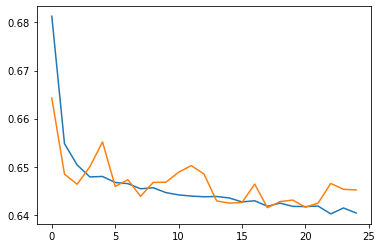

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=history.history["loss"])
sns.lineplot(data=history.history["val_loss"])
plt.show()

In [65]:
features = pd.read_csv("../Data/LogisticRegressionData/features.csv")
michigan = features.set_index("TeamID").loc[1276][1:].to_list()
flstate = features.set_index("TeamID").loc[1199][1:].to_list()

In [83]:
michigan

[24.43632180164532,
 13.212173409567926,
 22.233300262156924,
 9.351301034152774,
 15.465699359886775,
 11.096292711072511,
 15.402857791931035,
 1.4397230926540023,
 111.71135212174578,
 108.83013955935085]

In [84]:
flstate

[24.10497976991425,
 12.16122178665514,
 25.217152692378182,
 10.630962407389534,
 19.278009085351094,
 10.72078471094248,
 20.754550370255338,
 0.957060317434654,
 105.46173039392666,
 103.75780808683844]

In [85]:
import numpy as np
mvfl = michigan + flstate
logreg.predict(np.array(mvfl).reshape(1,-1))

array([1], dtype=int64)

In [86]:
linsvc.predict(np.array(mvfl).reshape(1,-1))

array([0], dtype=int64)

In [87]:
mvfl_poly = poly.fit_transform(np.array(mvfl).reshape(1,-1))
model.predict(mvfl_poly)

array([[1.]], dtype=float32)